# New Section

In [3]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('open-meteo-dataset.csv')
df

,time,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1451602800,51,16.8,10.2,13.8,16.0,9.3,13.2,1451629922,1451664775,...,13487.83,0.3,0.3,0.0,2.0,12.4,22.3,255,4.27,0.87
1,1451689200,2,20.2,11.3,15.0,18.6,9.9,13.7,1451716332,1451751223,...,31414.01,0.0,0.0,0.0,0.0,12.3,24.1,240,10.19,1.94
2,1451775600,61,16.8,13.4,14.7,13.3,11.3,12.3,1451802740,1451837672,...,29344.32,4.8,4.8,0.0,5.0,26.5,47.5,272,7.99,1.91
3,1451862000,53,20.0,14.1,16.9,16.9,12.5,14.8,1451889146,1451924122,...,16158.71,1.7,1.7,0.0,4.0,29.9,54.0,250,5.41,2.08
4,1451948400,51,20.9,14.2,17.0,19.2,12.6,15.5,1451975550,1452010574,...,29316.87,0.3,0.3,0.0,1.0,18.7,40.7,250,9.14,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,1717023600,1,30.2,17.6,23.6,30.4,18.3,23.5,1717041722,1717093905,...,46895.47,0.0,0.0,0.0,0.0,15.8,34.2,312,27.58,6.22
3073,1717110000,1,30.6,17.1,23.1,31.6,18.2,23.5,1717128099,1717180344,...,47017.66,0.0,0.0,0.0,0.0,23.5,49.0,30,27.60,5.87
3074,1717196400,1,26.3,16.6,21.8,27.7,16.7,22.5,1717214478,1717266781,...,46632.00,0.0,0.0,0.0,0.0,20.5,43.2,19,26.14,5.02
3075,1717282800,3,26.0,19.2,22.3,27.2,18.6,22.8,1717300859,1717353218,...,43805.94,0.0,0.0,0.0,0.0,18.7,39.2,358,23.32,4.92


In [5]:
df.isnull().sum()

time                           0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

time                           0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

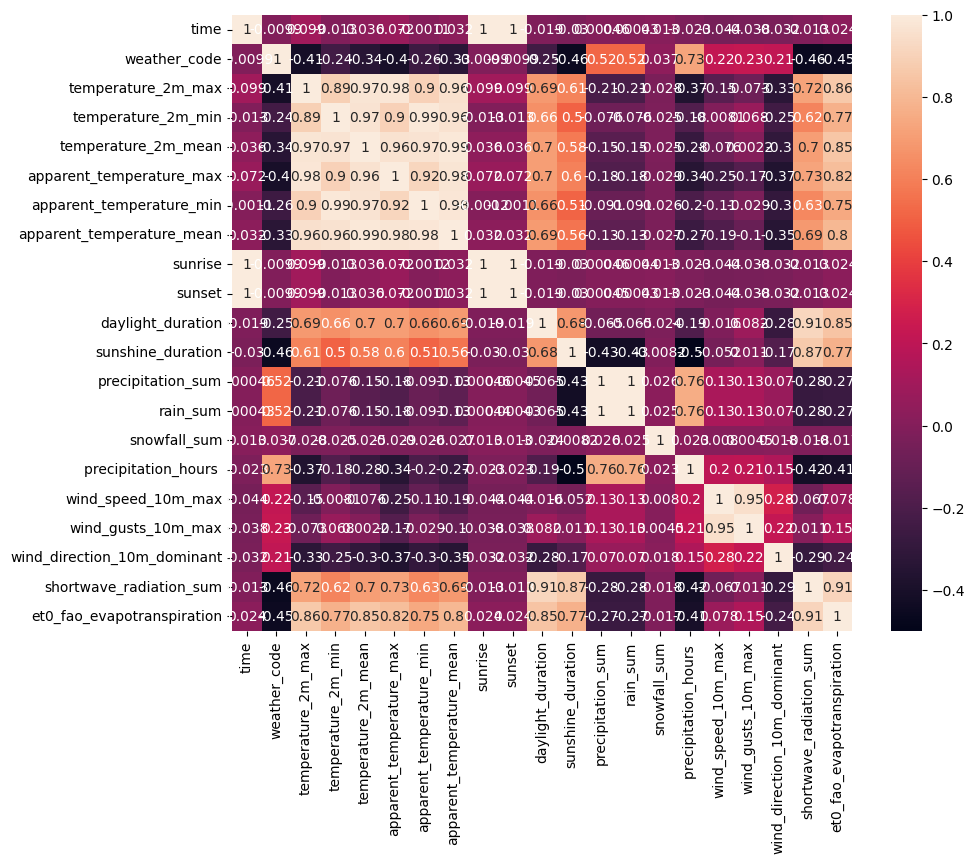

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [8]:
dfWithoutTarget=df.drop(columns=['temperature_2m_mean'])

In [9]:
matrix_correlation = dfWithoutTarget.corr()

seuil = 0.8
colonnes_fortement_correlees = []
for i in range(len(matrix_correlation.columns)):
    for j in range(i+1, len(matrix_correlation.columns)):
        if abs(matrix_correlation.iloc[i, j]) > seuil:
            colonnes_fortement_correlees.append((matrix_correlation.columns[i], matrix_correlation.columns[j]))
# Supposons que vous souhaitez conserver la colonne 'A'
df.drop([colonne for colonne, _ in colonnes_fortement_correlees], axis=1, inplace=True)
print('For each pair of columns strongly correlated with each other, one has been removed.')

For each pair of columns strongly correlated with each other, one has been removed.


In [10]:
df

,weather_code,temperature_2m_mean,apparent_temperature_mean,sunset,rain_sum,snowfall_sum,precipitation_hours,wind_gusts_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
0,51,13.8,13.2,1451664775,0.3,0.0,2.0,22.3,255,0.87
1,2,15.0,13.7,1451751223,0.0,0.0,0.0,24.1,240,1.94
2,61,14.7,12.3,1451837672,4.8,0.0,5.0,47.5,272,1.91
3,53,16.9,14.8,1451924122,1.7,0.0,4.0,54.0,250,2.08
4,51,17.0,15.5,1452010574,0.3,0.0,1.0,40.7,250,2.17
...,...,...,...,...,...,...,...,...,...,...
3072,1,23.6,23.5,1717093905,0.0,0.0,0.0,34.2,312,6.22
3073,1,23.1,23.5,1717180344,0.0,0.0,0.0,49.0,30,5.87
3074,1,21.8,22.5,1717266781,0.0,0.0,0.0,43.2,19,5.02
3075,3,22.3,22.8,1717353218,0.0,0.0,0.0,39.2,358,4.92


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to all columns
scaled_data = scaler.fit_transform(df.drop(columns=['temperature_2m_mean']))

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.drop(columns=['temperature_2m_mean']).columns)

# Display the scaled DataFrame
df_scaled['temperature_2m_mean']=df['temperature_2m_mean']

In [12]:
df

,weather_code,temperature_2m_mean,apparent_temperature_mean,sunset,rain_sum,snowfall_sum,precipitation_hours,wind_gusts_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
0,51,13.8,13.2,1451664775,0.3,0.0,2.0,22.3,255,0.87
1,2,15.0,13.7,1451751223,0.0,0.0,0.0,24.1,240,1.94
2,61,14.7,12.3,1451837672,4.8,0.0,5.0,47.5,272,1.91
3,53,16.9,14.8,1451924122,1.7,0.0,4.0,54.0,250,2.08
4,51,17.0,15.5,1452010574,0.3,0.0,1.0,40.7,250,2.17
...,...,...,...,...,...,...,...,...,...,...
3072,1,23.6,23.5,1717093905,0.0,0.0,0.0,34.2,312,6.22
3073,1,23.1,23.5,1717180344,0.0,0.0,0.0,49.0,30,5.87
3074,1,21.8,22.5,1717266781,0.0,0.0,0.0,43.2,19,5.02
3075,3,22.3,22.8,1717353218,0.0,0.0,0.0,39.2,358,4.92


In [13]:
# prompt: split data into train and test

X = df.drop('temperature_2m_mean', axis=1)
y = df['temperature_2m_mean']
scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# prompt: how to create linear regression model

from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)


Mean squared error: 0.3101513921719741
R-squared score: 0.9916594284312886


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
filename = 'weather-model.sav'
pickle.dump(model, open(filename, 'wb'))


In [16]:
# prompt: how to test my model with exemple of entries
new_data = [[3,31.2,1717958255,0.00,0.00,0.0,45.0,148,7.56]]
#new_data = [[2024,158,3.13,4.8,76.5,28.69,16.03]]
# Predict using the saved model
predicted_value = model.predict(new_data)

# Print the predicted value
print("Predicted value:", predicted_value)

Predicted value: [29.63284424]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
df

,weather_code,temperature_2m_mean,apparent_temperature_mean,sunset,rain_sum,snowfall_sum,precipitation_hours,wind_gusts_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
0,51,13.8,13.2,1451664775,0.3,0.0,2.0,22.3,255,0.87
1,2,15.0,13.7,1451751223,0.0,0.0,0.0,24.1,240,1.94
2,61,14.7,12.3,1451837672,4.8,0.0,5.0,47.5,272,1.91
3,53,16.9,14.8,1451924122,1.7,0.0,4.0,54.0,250,2.08
4,51,17.0,15.5,1452010574,0.3,0.0,1.0,40.7,250,2.17
...,...,...,...,...,...,...,...,...,...,...
3072,1,23.6,23.5,1717093905,0.0,0.0,0.0,34.2,312,6.22
3073,1,23.1,23.5,1717180344,0.0,0.0,0.0,49.0,30,5.87
3074,1,21.8,22.5,1717266781,0.0,0.0,0.0,43.2,19,5.02
3075,3,22.3,22.8,1717353218,0.0,0.0,0.0,39.2,358,4.92
